# (Loan Data from Prosper)
## by (Marwa Qabeel)

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing) explains the variables in the data set.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Set the grid for the output coulmns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [80]:
sb.set_style("ticks")
plt.rc('figure', figsize=(6, 4), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#f5f5f5", 
       linewidth=0.4, grid=True, labelsize=8)
plt.rc('patch', linewidth=0)
plt.rc('grid', color='#d4d2d2')

#### The next lines of code to adjust the style of the output tables in my notebook to have outlined edges →→→ Ignore it

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [5]:
# load in the dataset into a pandas dataframe, print statistics
loan_df = pd.read_csv("../Data/prosperLoanData.csv")

In [6]:
# Explore the dataframe size
loan_df.shape

(113937, 81)

In [7]:
# Check data types of the dataset fields
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [8]:
# Explore the first few rows
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [9]:
# check for duplicates in the dataset
sum(loan_df.duplicated())

0

In [10]:
#Check for number and percentage of Nulls

# Getting the number of missing values in each column
num_missing = loan_df.isna().sum()

# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]

# Getting the percentages of missing values and round down the result 
percent_missing = num_missing * 100 / loan_df.shape[0]
percent_missing = percent_missing.round(2) 

# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it 
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
GroupKey,100596,88.29
LoanFirstDefaultedCycleNumber,96985,85.12
ScorexChangeAtTimeOfListing,95009,83.39
ProsperPrincipalOutstanding,91852,80.62
ProsperPrincipalBorrowed,91852,80.62
ProsperPaymentsOneMonthPlusLate,91852,80.62
ProsperPaymentsLessThanOneMonthLate,91852,80.62
OnTimeProsperPayments,91852,80.62
TotalProsperPaymentsBilled,91852,80.62
TotalProsperLoans,91852,80.62


It seems that there are a lot of nulls for most of the varivles in the dataset, since I'm only intersted to invistigate some of the feeatures of this dataset, I will subset the dataframe to extecte the features of interset for my anlysis and remove the nulls for this subset dataframe only

In [11]:
# Subset the dataframe by selecting features of interest

sub_data =  [
    'BorrowerAPR', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Term', 'Recommendations', 'Investors']


loan_subdata = loan_df[sub_data]

In [12]:
loan_subdata.sample(5)

,BorrowerAPR,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Term,Recommendations,Investors
5916,0.35356,Completed,0.3134,HR,1,Employed,3.0,2333.333333,NaN,4000,2013-11-01 00:00:00,36,0,23
11077,0.35797,Chargedoff,0.3177,HR,1,Employed,0.0,3583.333333,NaN,3500,2012-03-08 00:00:00,36,0,78
93259,0.12700,Completed,0.1200,NaN,0,Not available,28.0,2008.333333,NaN,7220,2007-01-10 00:00:00,36,0,76
62852,0.17969,Current,0.1435,B,1,Self-employed,0.0,2583.000000,NaN,6000,2013-11-29 00:00:00,36,0,1
33148,0.22362,Completed,0.1899,C,3,Full-time,73.0,9490.000000,1.0,15000,2011-10-05 00:00:00,36,1,22


In [13]:
loan_subdata.shape

(113937, 14)

### Dealing with the missing values:

Based on the data types of the features and the avalible information in the [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit?usp=sharing), I will replace the null values for the categorical varibles with 'None', and the null values of the numerical varibles (integers or floats) will be replaced with 0.

In [14]:
# Let's check number of null values for the subset data 
missing_values = loan_subdata.isnull().sum()

# sort the data 
missing_values.sort_values(ascending=False)

TotalProsperLoans            91852
ProsperRating (Alpha)        29084
EmploymentStatus              2255
DelinquenciesLast7Years        990
BorrowerAPR                     25
Investors                        0
Recommendations                  0
Term                             0
LoanOriginationDate              0
LoanOriginalAmount               0
StatedMonthlyIncome              0
ListingCategory (numeric)        0
BorrowerRate                     0
LoanStatus                       0
dtype: int64

In [15]:
# now let's remove the nulls for the new dataframe

# Replace all the categorical features Nulls with 'None'
for col in ['ProsperRating (Alpha)', 'EmploymentStatus']:
    loan_subdata[col].fillna('None', inplace=True)
    
    
# Replace all the numerical features Nulls with 0
for col in ['TotalProsperLoans', 'DelinquenciesLast7Years', 'BorrowerAPR']:
    loan_subdata[col].fillna(0, inplace=True)

C:\Users\computer\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
loan_subdata.isna().values.sum()

0

### Descriptive Statistics

#### Statistics for the Numerical varibles

In [17]:
# Get the summary statiscircs for the numeric values 
# exluding 'count' here, as we aleardy know the total count for each varible

loan_subdata.describe().transpose() \
    .drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
BorrowerAPR,0.218780,0.080421,0.0,0.156290,0.209710,0.2837,5.122900e-01
BorrowerRate,0.192764,0.074818,0.0,0.134000,0.184000,0.2500,4.975000e-01
ListingCategory (numeric),2.774209,3.996797,0.0,1.000000,1.000000,3.0000,2.000000e+01
DelinquenciesLast7Years,4.118881,10.123325,0.0,0.000000,0.000000,3.0000,9.900000e+01
StatedMonthlyIncome,5608.025568,7478.497275,0.0,3200.333333,4666.666667,6825.0000,1.750003e+06
TotalProsperLoans,0.275459,0.654774,0.0,0.000000,0.000000,0.0000,8.000000e+00
LoanOriginalAmount,8337.013850,6245.800580,1000.0,4000.000000,6500.000000,12000.0000,3.500000e+04
Term,40.830248,10.436212,12.0,36.000000,36.000000,36.0000,6.000000e+01
Recommendations,0.048027,0.332353,0.0,0.000000,0.000000,0.0000,3.900000e+01
Investors,80.475228,103.239020,1.0,2.000000,44.000000,115.0000,1.189000e+03


#### Statistics for the categorical variables

I will use describe function and to select the non-numerical columns, I will use np.object

In [18]:
# Get the summary statiscircs for the non-numeric columns
# exluding 'count' here, as we aleardy know the total count for each varible

loan_subdata.describe(include=[np.object]).transpose() \
    .drop("count", axis=1)

,unique,top,freq
LoanStatus,12,Current,56576
ProsperRating (Alpha),8,None,29084
EmploymentStatus,9,Employed,67322
LoanOriginationDate,1873,2014-01-22 00:00:00,491


Before starting with the Univariate Exploration, I need to seperate the Numerical and Categorical varibles to get a better understanding about their distirbution, and assign two variables to hold the columns of the numerical and categorical variables:

In [22]:
# Finding numerical features
numeric_data = loan_subdata.select_dtypes(include = [np.number])

# Finding categorical features
categorical_data = loan_subdata.select_dtypes(exclude = [np.number])

# Let's print how many numerical and categorical features do we have
print('There are {0} numerical and {1} categorical features in the dataset'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 10 numerical and 4 categorical features in the dataset


### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

- I'll start by looking at the distribution of the main variable of interest: `'BorrowerAPR'`

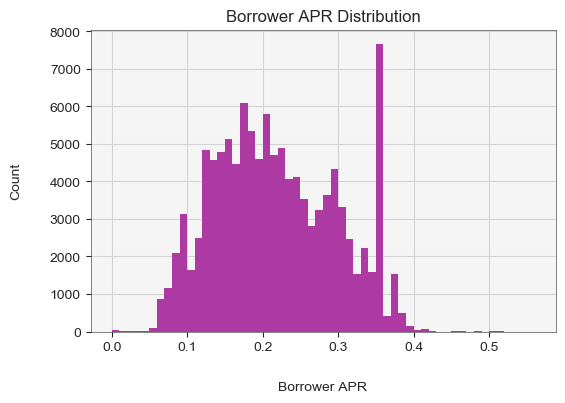

In [19]:
# check the frequency of all 'BorrowerAPR' values
bins = np.arange(0, loan_subdata.BorrowerAPR.max()+0.05, 0.01)

plt.hist(data = loan_subdata, x = 'BorrowerAPR', bins = bins, color='#ad39a2');
plt.title('Borrower APR Distribution')
plt.xlabel('Borrower APR')
plt.ylabel('Count');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.


The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

Now let's look at the distribution of the first predictor variable of interest: `LoanOriginalAmount`

based on the descriptive statistics of `LoanOriginalAmount`, the minimum at ~$8,337 and the maximum value at $35,000

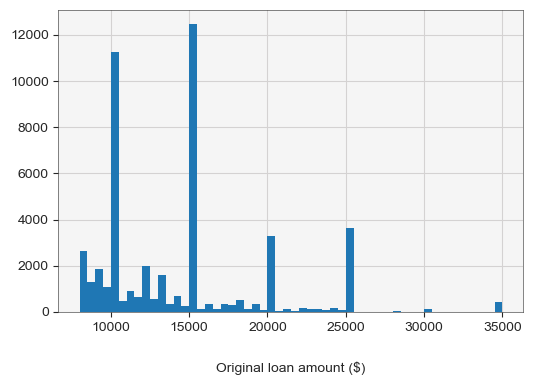

In [20]:
# check the frequency of all 'LoanOriginalAmount' values
bins = np.arange(8000, loan_subdata.LoanOriginalAmount.max()+200, 500)
# plt.figure(figsize=[8, 5])
plt.hist(data = loan_subdata, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

### Categorical features Categorization:
Before starting with the Bivariate analysis, I want to explore how the values is being categorized in each Categorical feature:



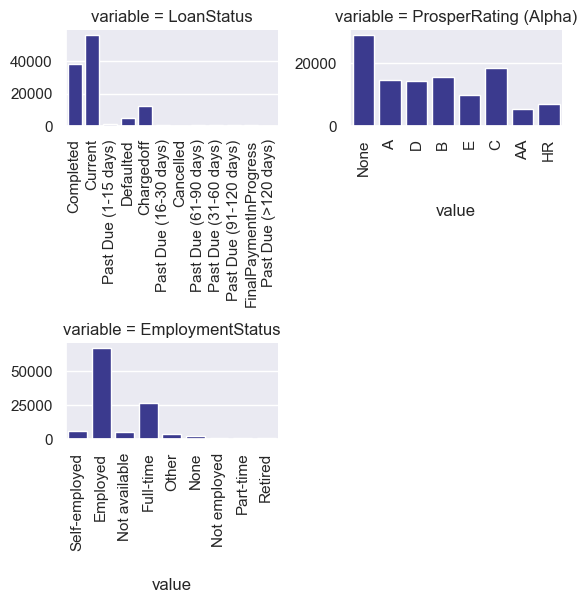

In [60]:
# Let's plot count of the categorical features
# A "count plot" can be thought of as a histogram across a categorical, instead of quantitative variable

melt_cat_features = pd.melt(loan_subdata, value_vars=['LoanStatus', 'ProsperRating (Alpha)', 'EmploymentStatus'])
grid = sb.FacetGrid(melt_cat_features, col="variable", col_wrap=2, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
grid = grid.map(sb.countplot, "value", color="#2d2c9c") 
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in grid.axes.flat]
grid.fig.tight_layout(pad=0.5, w_pad=1, h_pad=1)
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

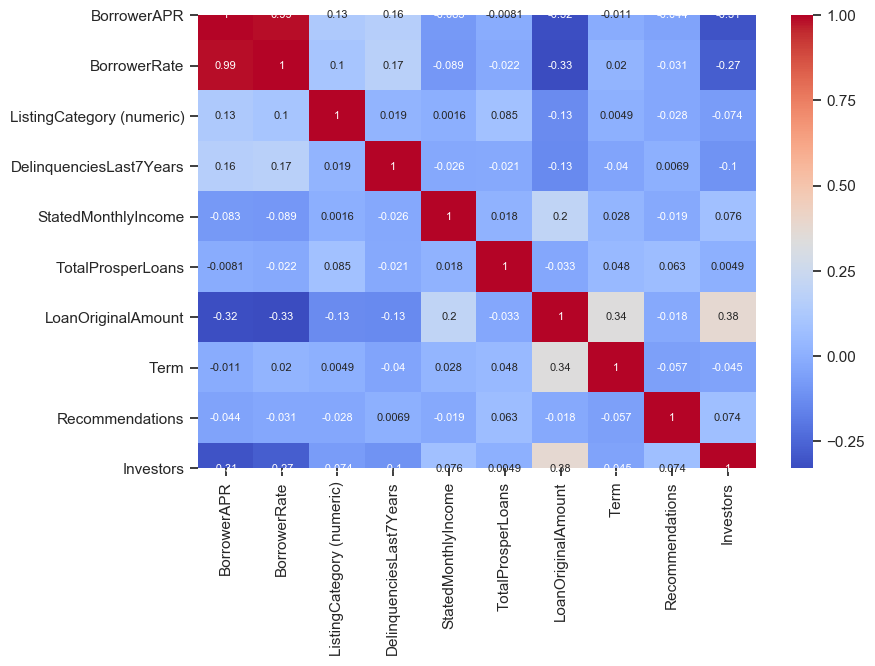

In [81]:
# Plotting heatmap grapgh to explore correlation


corr = numeric_data.corr()

fig, ax = plt.subplots(figsize=(9,6))
sb.heatmap(corr, ax=ax, annot = True, annot_kws={"size": 8}, cmap="coolwarm");

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!